In [1]:
import os
from os import path as ospath

import numpy as np
import pandas as pd

import geopandas as gpd
import fiona
import pyproj
import contextily as ctx

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [3]:

def project(gdf):
    gdf.crs = {'init' :'epsg:4326'}
    gdf = gdf.to_crs({'init' :'epsg:3857'})
    return gdf

sc = project(gpd.read_file("subcatchments.shp"))
cs = project(gpd.read_file("conduits.shp"))
js = project(gpd.read_file("junctions.shp"))
ol = project(gpd.read_file("outlets.shp"))
st = project(gpd.read_file("storage.shp"))
cx = project(gpd.read_file("connections.shp"))

#sc.crs = "EPSG:26917"


C:\Users\everett\anaconda3\envs\reckless\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\everett\anaconda3\envs\reckless\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\everett\anaconda3\envs\reckless\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When m

In [4]:
clr = {
    'purple': (0.518, 0.000, 0.333),
    'red': (0.808, 0.082, 0.247),
    'blue': (0.000, 0.208, 0.373),
    'green': (0.169, 0.655, 0.565),
    'yellow': (0.992, 0.718, 0.075),
    'red2': (0.890, 0.094, 0.216)
}

In [122]:
e

-8869344.781510567

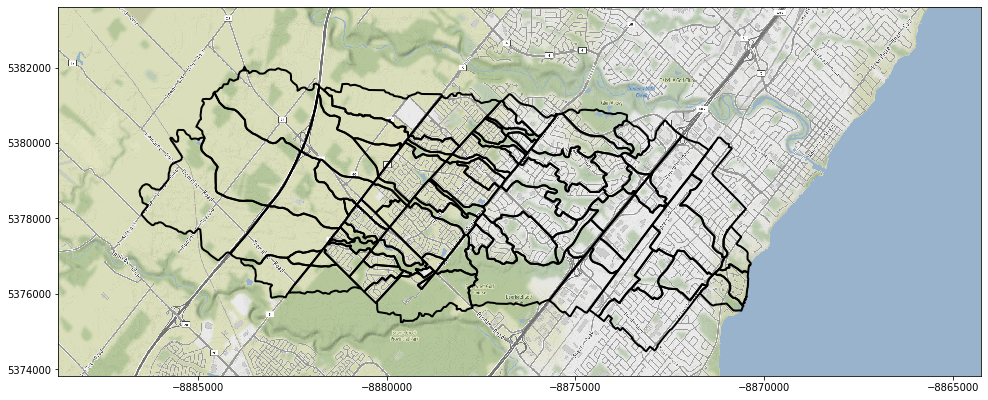

In [5]:
fig, ax = plt.subplots(figsize=(42/2.54,20/2.54))
w, s, e, n = sc.buffer(0).total_bounds
e = e+4000
img, ext = ctx.bounds2img(w, s, e, n, 14)
plt.imshow(img, extent=ext)

sc.plot(ax=ax,label="subcatchment",facecolor="None",edgecolor="k", linewidth=2)

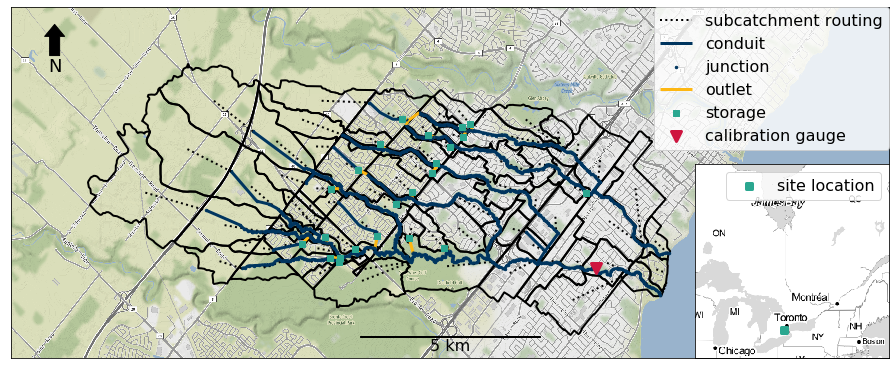

In [8]:
#fig, ax = plt.subplots(figsize=(42/2.54,20/2.54))

fig = plt.figure()
fig.set_size_inches(40/2.54, 20/2.54)
gs = gridspec.GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[:,:])

ax.set_anchor("SW")

    
#ax = plt.subplot(gs[0:2,0:9])

w, s, e, n = sc.buffer(0).total_bounds
e = e+4000
#w = w+1000
img, ext = ctx.bounds2img(w, s, e, n, 14)
plt.imshow(img, extent=ext)

sc.plot(ax=ax,label="subcatchment",facecolor="None",edgecolor="k", linewidth=2)
cx.plot(ax=ax,label="subcatchment routing",edgecolor="k",linewidth=2, linestyle="dotted")
cs.plot(ax=ax,label="conduit",edgecolor=clr["blue"], linewidth=3, zorder=5)
js.plot(ax=ax,label="junction",edgecolor=clr["blue"], facecolor=clr["blue"],markersize=6)
ol.plot(ax=ax,label="outlet",edgecolor=clr["yellow"], facecolor=clr["yellow"], linewidth=3)
st.plot(ax=ax,label="storage", marker="s", edgecolor=clr["green"],facecolor=clr["green"], zorder=6)


cs[cs.Name == 'CJ1902.476'].centroid.plot(ax=ax, label="calibration gauge", marker="v", markersize=100, edgecolor=clr["red"], linewidth=3, facecolor=clr["red"], zorder=10)


#ctx.add_basemap(ax=ax, attribution="", zoom=14)

x, y, arrow_length = 0.05, 0.95, 0.12
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=18,
            xycoords=ax.transAxes)

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=16, family='DejaVu Sans')
scalebar = AnchoredSizeBar(ax.transData,
                           5000, '5 km', 'lower center', 
                           pad=0.2,
                           color='black',
                           frameon=False,
                           size_vertical=10,
                           fontproperties=fontprops)

#ax.set_xlim(-8890000, -8870000)
#ax.set_ylim(5374500, 5382500)
ax.axes.get_xaxis().set_visible(False) 
ax.axes.get_yaxis().set_visible(False)

ax.add_artist(scalebar)


ax.legend(loc='upper right', prop=fontprops, borderaxespad=0.)

ax2 = fig.add_subplot(gs[-1,-1])
ax2.set_anchor("SE")

#ax2 = plt.subplot(gs[0:1,8:10])
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot(ax=ax2, color="None", edgecolor="k", linewidth = 1)


w, s, e, n = cs[cs.Name == 'CJ1902.476'].centroid.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, 4, source=ctx.providers.Stamen.TonerLite)
ax2.imshow(img, extent=ext)

cs[cs.Name == 'CJ1902.476'].centroid.plot(ax=ax2, edgecolor=clr["green"], marker="s", label="site location", linewidth=3, facecolor=clr["green"])


#ax2.set_xlim(-140, -30)
#ax2.set_ylim(10, 90)
ax2.axes.get_xaxis().set_visible(False) 
ax2.axes.get_yaxis().set_visible(False)
ax2.legend(prop=fontprops)
figname = r"fourteenmile"+".png"
plt.savefig(figname, bbox_inches='tight',pad_inches = 0, dpi = 400)

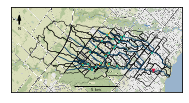

In [85]:
#fig, ax = plt.subplots(figsize=(42/2.54,20/2.54))

fig = plt.figure()
fig.set_size_inches(8/2.54, 4/2.54)
gs = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[:,:])

ax.set_anchor("SW")

    
#ax = plt.subplot(gs[0:2,0:9])

w, s, e, n = sc.buffer(0).total_bounds
#e = e+4000
#w = w+1000
img, ext = ctx.bounds2img(w, s, e, n, 14)
plt.imshow(img, extent=ext)

sc.plot(ax=ax,label="subcatchment",facecolor="None",edgecolor="k", linewidth=0.5)
cx.plot(ax=ax,label="subcatchment routing",edgecolor="grey",linewidth=0.5, linestyle=(0, (1, 1)))
cs.plot(ax=ax,label="conduit",edgecolor=clr["blue"], facecolor=clr["blue"], linewidth=0.8, zorder=5, linestyle="solid")
#js.plot(ax=ax,label="junction",edgecolor=clr["blue"], facecolor=clr["blue"],markersize=0.2)
ol.plot(ax=ax,label="outlet",edgecolor=clr["yellow"], facecolor=clr["yellow"], linewidth=0.8)
st.plot(ax=ax,label="storage", marker="s", markersize=1, edgecolor=clr["green"],facecolor=clr["green"], zorder=6)


cs[cs.Name == 'CJ1902.476'].centroid.plot(ax=ax, label="calibration gauge", marker="v", markersize=8, edgecolor=clr["red"], linewidth=0.8, facecolor=clr["red"], zorder=10)


#ctx.add_basemap(ax=ax, attribution="", zoom=14)

x, y, arrow_length = 0.05, 0.90, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=0.6, headwidth=3,headlength=5),
            ha='center', va='center', fontsize=4,
            xycoords=ax.transAxes)

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=4, family='DejaVu Sans')
scalebar = AnchoredSizeBar(ax.transData,
                           5000, '5 km', 'lower center', 
                           pad=0.05,
                           color='black',
                           frameon=False,
                           size_vertical=6,
                           fontproperties=fontprops)

#ax.set_xlim(-8890000, -8870000)
#ax.set_ylim(5374500, 5382500)
ax.axes.get_xaxis().set_visible(False) 
ax.axes.get_yaxis().set_visible(False)

ax.add_artist(scalebar)


#ax.legend(loc='upper right', prop=fontprops, borderaxespad=0.)

#ax2 = fig.add_subplot(gs[-1,-1])
#ax2.set_anchor("SE")

#ax2 = plt.subplot(gs[0:1,8:10])
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot(ax=ax2, color="None", edgecolor="k", linewidth = 1)


w, s, e, n = cs[cs.Name == 'CJ1902.476'].centroid.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, 4, source=ctx.providers.Stamen.TonerLite)
#ax2.imshow(img, extent=ext)

cs[cs.Name == 'CJ1902.476'].centroid.plot(ax=ax2, edgecolor=clr["green"], marker="s", label="site location", linewidth=3, facecolor=clr["green"])


#ax2.set_xlim(-140, -30)
#ax2.set_ylim(10, 90)
#ax2.axes.get_xaxis().set_visible(False) 
#ax2.axes.get_yaxis().set_visible(False)
#ax2.legend(prop=fontprops)
figname = r"fourteenmile"+".png"
plt.savefig(figname, bbox_inches='tight',pad_inches = 0, dpi = 400)

In [54]:
ok

NameError: name 'ok' is not defined

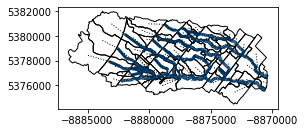

In [10]:
fig, ax = plt.subplots(figsize=(10/2.54,5/2.54))

sc.plot(ax=ax,color="None",edgecolor="k", linewidth=1)
cx.plot(ax=ax,edgecolor="k",linewidth=1, linestyle="dotted")
cs.plot(ax=ax,edgecolor=clr["blue"], linewidth=3)
ol.plot(ax=ax,edgecolor=clr["blue"], facecolor=clr["blue"], linewidth=2)